<a href="https://colab.research.google.com/github/the-cryptozoologist/data-science/blob/main/spectral/signal_prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

import copy

import seaborn as sns
sns.set_style("whitegrid")

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
N = 100001
time = np.linspace(0, 4 * np.pi, N)

signal = np.zeros(N)

for i in range(1,6):
  signal += np.cos(i*time)**i

noise = signal + np.random.randn(N)

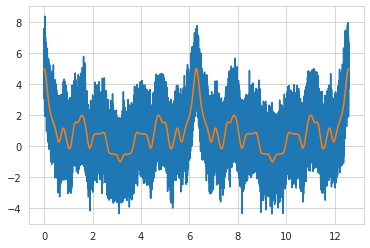

In [3]:
plt.plot(time,noise, time, signal)
plt.show()

In [ ]:
# running-mean filter

filtered = copy.deepcopy(noise)

k = 15

for n in range(N):
  lb = np.max((0,n-k))
  ub = np.min((N,n+k))
  filtered[n] = np.mean(noise[lb:ub])

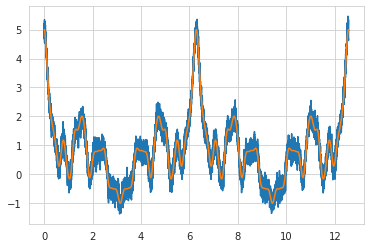

In [ ]:
plt.plot(time, filtered, time, signal)
plt.show()

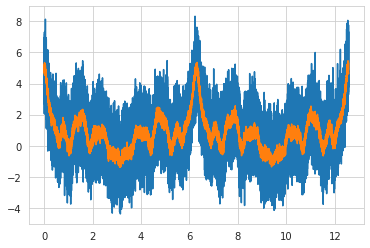

In [ ]:
plt.plot(time,noise,time,filtered)
plt.show()

In [ ]:
def smooth(signal_input, k):
  filtered_signal = copy.deepcopy(signal_input)
  for i in range(N):
    filtered_signal[i] = np.mean(signal_input[np.max((0, i-k)):np.min((N, i+k))])
  return filtered_signal

In [ ]:
vals = np.arange(5,59)
sigcorr = []

for v in vals:
  fsig = smooth(noise, v)
  sigcorr.append(np.corrcoef(fsig,signal)[0,1])

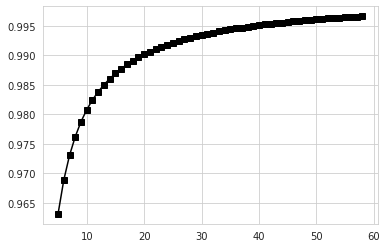

In [ ]:
plt.plot(vals, sigcorr,"ks-")

In [24]:
# Gaussian convolution

from scipy.signal import detrend

srate = 1024
time = np.arange(-2,2+1/srate,1/srate)
pnts = len(time)

signal = detrend(time**3 + np.sign(time))
noise = signal + np.random.randn(pnts)*1.1

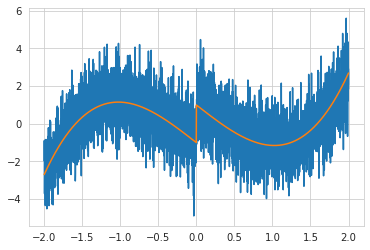

In [25]:
plt.plot(time,noise,time,signal)
plt.show()

In [28]:
k = 10
x = np.arange(-k+1,k)/srate
s = 0.005
gkern = np.exp((-x**2)/(2*s**2))

Text(0.5, 1.0, 'n = 21, s = 0.005')

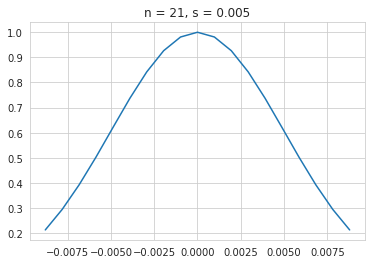

In [31]:
plt.plot(x,gkern,"-")
plt.title("n = %s, s = %g"%(2*k+1,s))

In [36]:
gkern /= sum(gkern)
filtsig = np.convolve(noise,gkern,mode="same")

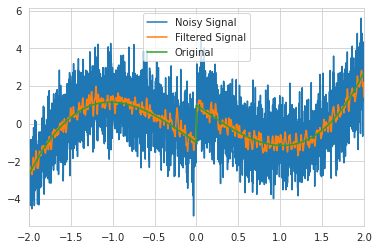

In [38]:
plt.plot(time,noise,time,filtsig,time,signal)
plt.legend(["Noisy Signal","Filtered Signal", "Original"])
plt.xlim(time[[0,-1]])
plt.show()

In [50]:
krange = np.arange(3,503,20)
srange = np.linspace(0.001,0.5,70)

matrix = np.zeros((len(krange),len(srange)))
allkerns = [[0]*len(srange) for i in range(len(krange))]

In [52]:
for k in range(len(krange)):
  for s in range(len(srange)):
    x = np.arange(-krange[k],krange[k]+1)/srate
    gkern = np.exp(-x**2/(2*srange[s]**2))

    filtsig = np.convolve(noise,gkern/sum(gkern),mode="same")

    matrix[k,s] = np.sum((filtsig-signal)**2)
    allkerns[k][s] = gkern

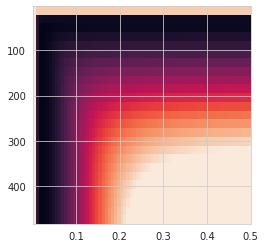

In [49]:
plt.imshow(matrix, vmax = 800,
           extent=[srange[0],srange[-1],krange[-1],krange[0]])
plt.gca().set_aspect(1/plt.gca().get_data_ratio())
plt.show()

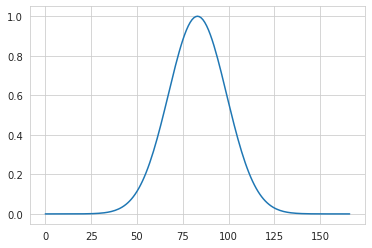

In [55]:
plt.plot(allkerns[4][2])
plt.show()

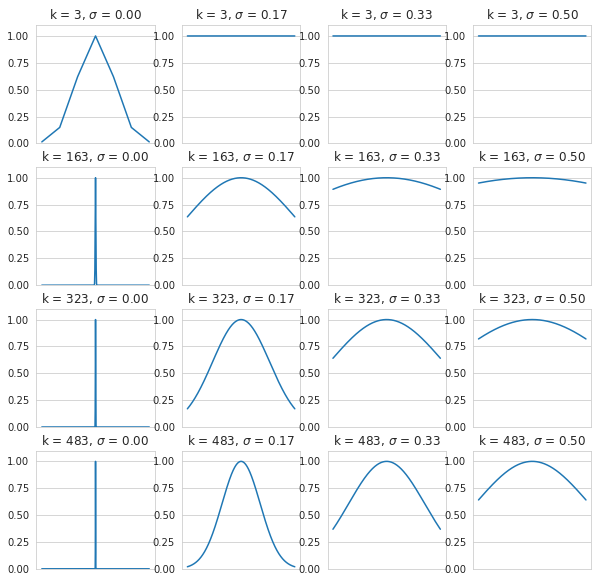

In [60]:
fig,ax = plt.subplots(4,4,figsize=(10,10))

sidx = np.linspace(0,len(srange)-1,4).astype(int)
kidx = np.linspace(0,len(krange)-1,4).astype(int)

for si in range(4):
  for kj in range(4):
    ax[kj,si].plot(allkerns[kidx[kj]][sidx[si]])
    ax[kj,si].set_xticks([])
    ax[kj,si].set_ylim([0,1.1])
    ax[kj,si].set_aspect(1/ax[kj,si].get_data_ratio())
    ax[kj,si].set_title("k = %s, $\sigma$ = %.2f"%(krange[kidx[kj]],srange[sidx[si]]))
plt.show()

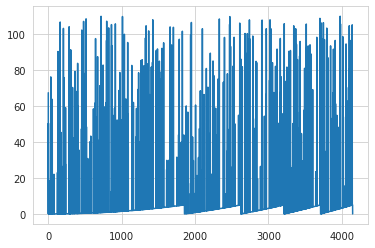

In [89]:
# Median filter despeckling

import random
pts = random.choice(range(1000,5000))

signal = np.mod(np.linspace(0,5,pts)**2,5)

p = int(0.1*pts)
spiket = np.random.randint(0,pts,p)

signal[spiket] = np.random.rand(p)*100 + 10

plt.plot(signal)
plt.show()

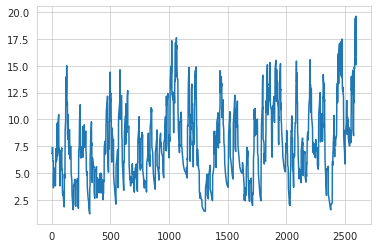

In [85]:
# Mean-smoothing test

k = 15

for i in range(pts):
  signal[i] = np.mean(signal[np.max((0,i-k)):np.min((pts,i+k))])

plt.plot(signal)

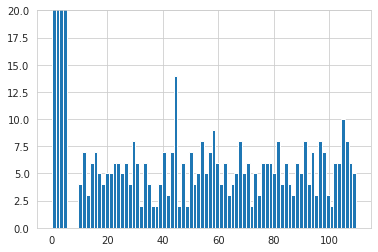

In [90]:
# Define threshold empirically

plt.hist(signal,80)
plt.ylim([0,20])
plt.show()

In [91]:
# Supra-threshold data indices

thresh = 8

suprathresh = np.where(signal>thresh)[0]

100*len(suprathresh)/pts

9.448059773439383

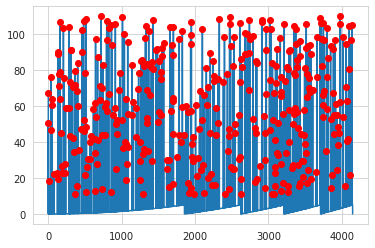

In [92]:
plt.plot(signal)
plt.plot(suprathresh, signal[suprathresh], "ro")
plt.show()

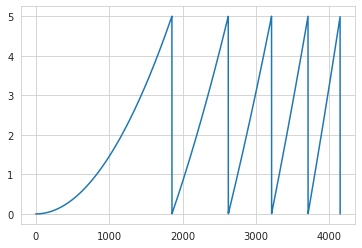

In [93]:
k = 7

for i in suprathresh:
  lb = np.max((0,i-k))
  ub = np.min((pts,i+k))
  signal[i] = np.median(signal[lb:ub])
plt.plot(signal)
plt.show()